# Bus Ridership Analysis
Name: Edward Tan Yuan Chong

OBJECTIVES:
1. Analyse trends in ridership of buses and identify factors affecting it.
2. Analyse nature of bus operators and find out which contributes most to ridership.

### Import libraries

In [1]:
# Importing libraries 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go

c:\Users\edw4r\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ImportError: cannot import name 'json' from 'itsdangerous' (c:\Users\edw4r\anaconda3\lib\site-packages\itsdangerous\__init__.py)

### Importing Singapore Public Transport datasets

In [2]:
# Importing datasets
bus_routes = pd.read_csv("./bus_routes.csv",index_col=0)
bus_services = pd.read_csv("./bus_services.csv",index_col=0)
bus_stops = pd.read_csv("./bus_stops.csv",index_col=0)
ridership = pd.read_csv("./M651351.csv",index_col=0)

### Functions to be used

- removeOutliers function: Remove outliers (data past upper/lower fence)
- summarise function: Collation of summary functions from pandas such as .info(), .sample(), .head() , .tail(), .shape, .size, .nunique(), .isnull().sum()
- dropValues function: Drop NaN values with .dropna() and duplicate values with .drop_duplicates()
- printMissing function: Uses .isnull().sum() to print number of missing values in given dataset
- printInfo function: print number of rows and columns of dataset given

In [3]:
def removeOutliers(dataset):
    q1,q3 = np.percentile(dataset,[25,75])
    valueIQR = q3-q1
    upperFence = q3+1.5*valueIQR
    lowerFence = q1-1.5*valueIQR
    dataset = dataset[dataset<upperFence]
    dataset = dataset[dataset>lowerFence]
    return dataset

def summarise(dataset):
    print("Information of dataset:")
    dataset.info()
    print("Sample of dataset:\n" + str(dataset.sample()))
    print("Head of dataset:\n" + str(dataset.head(1)) + "\nTail of dataset:\n" + str(dataset.tail(1)))
    print("\nShape of dataset: " + str(dataset.shape) + '\t Size of dataset:' + str(dataset.size))
    print("\nNumber of unique values per column in dataset:\n" + str(dataset.nunique()))
    print("\nNumber of missing data in dataset:\n" + str(dataset.isnull().sum()))

def dropValues(dataset):
    dataset.replace(to_replace=['na','-'],value=np.nan,inplace=True)
    dataset.dropna(inplace=True)
    dataset.drop_duplicates(inplace=True)
    return dataset

def printMissing(dataset,context):
    if(context == "before"):
        print("Number of missing values before cleaning:\n" + str(dataset.isnull().sum()))
    elif(context == 'after'):
        print("\nNumber of missing values after cleaning:\n" + str(dataset.isnull().sum()))
    else:
        print("Number of missing values:\n" + str(dataset.isnull().sum()))

def printInfo(dataset):
    dataset.info()
    print(f"\nDataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

### Variables to be used later on

In [4]:
# Colour palette to be used later on
colour = sns.color_palette("muted")

### Cleaning dataset #1 - Bus routes

- .astype() to change column data type
- .head(5) to print first 5 missing rows

In [5]:
printMissing(bus_routes,context='before')

# Drop rows with missing + duplicate values
bus_routes = dropValues(bus_routes)

# Change data type of columns
bus_routes['Direction'] = bus_routes['Direction'].astype(str)

printMissing(bus_routes,context='after')

bus_routes.head(5)

Number of missing values before cleaning:
ServiceNo       0
Operator        0
Direction       0
StopSequence    0
BusStopCode     0
Distance        5
WD_FirstBus     0
WD_LastBus      0
SAT_FirstBus    0
SAT_LastBus     0
SUN_FirstBus    0
SUN_LastBus     0
dtype: int64

Number of missing values after cleaning:
ServiceNo       0
Operator        0
Direction       0
StopSequence    0
BusStopCode     0
Distance        0
WD_FirstBus     0
WD_LastBus      0
SAT_FirstBus    0
SAT_LastBus     0
SUN_FirstBus    0
SUN_LastBus     0
dtype: int64


,ServiceNo,Operator,Direction,StopSequence,BusStopCode,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus
0,10,SBST,1,1,75009,0.0,0500,2300,0500,2300,0500,2300
1,10,SBST,1,2,76059,0.6,0502,2302,0502,2302,0502,2302
2,10,SBST,1,3,76069,1.1,0504,2304,0504,2304,0503,2304
3,10,SBST,1,4,96289,2.3,0508,2308,0508,2309,0507,2308
4,10,SBST,1,5,96109,2.7,0509,2310,0509,2311,0508,2309


### Information of dataset #1

In [6]:
printInfo(bus_routes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20393 entries, 0 to 25817
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ServiceNo     20393 non-null  object 
 1   Operator      20393 non-null  object 
 2   Direction     20393 non-null  object 
 3   StopSequence  20393 non-null  int64  
 4   BusStopCode   20393 non-null  object 
 5   Distance      20393 non-null  float64
 6   WD_FirstBus   20393 non-null  object 
 7   WD_LastBus    20393 non-null  object 
 8   SAT_FirstBus  20393 non-null  object 
 9   SAT_LastBus   20393 non-null  object 
 10  SUN_FirstBus  20393 non-null  object 
 11  SUN_LastBus   20393 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.0+ MB

Dataset has 20393 rows and 12 columns.


### Cleaning dataset #2 - Bus services

- .drop() to drop columns
- .astype() to change data type of columns
- .sample(5) to print 5 random rows of dataset

In [7]:
printMissing(bus_services,context='before')

# Drop rows with missing + duplicate values
bus_services = dropValues(bus_services)

# Drop columns that are not going to be used
bus_services.drop(['OriginCode','DestinationCode','LoopDesc'],inplace=True,axis=1)

# Change data type of columns
bus_services['Direction'] = bus_services['Direction'].astype(str)

printMissing(bus_services,context='after')

bus_services.sample(5)


Number of missing values before cleaning:
ServiceNo            0
Operator             0
Direction            0
Category             0
OriginCode           2
DestinationCode      2
AM_Peak_Freq         0
AM_Offpeak_Freq      0
PM_Peak_Freq         0
PM_Offpeak_Freq      1
LoopDesc           466
dtype: int64

Number of missing values after cleaning:
ServiceNo          0
Operator           0
Direction          0
Category           0
AM_Peak_Freq       0
AM_Offpeak_Freq    0
PM_Peak_Freq       0
PM_Offpeak_Freq    0
dtype: int64


,ServiceNo,Operator,Direction,Category,AM_Peak_Freq,AM_Offpeak_Freq,PM_Peak_Freq,PM_Offpeak_Freq
295,298,SBST,1,FEEDER,10-10,10-12,10-12,10-16
654,284,TTS,1,FEEDER,05-06,06-08,04-06,04-07
245,228,SBST,1,FEEDER,8-9,8-17,8-10,9-26
659,41,TTS,1,TRUNK,10-12,13-15,11-15,12-15
92,123M,SBST,1,TRUNK,10-14,10-20,12-15,14-15


### Information of dataset #2

In [8]:
printInfo(bus_services)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 4 to 699
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ServiceNo        215 non-null    object
 1   Operator         215 non-null    object
 2   Direction        215 non-null    object
 3   Category         215 non-null    object
 4   AM_Peak_Freq     215 non-null    object
 5   AM_Offpeak_Freq  215 non-null    object
 6   PM_Peak_Freq     215 non-null    object
 7   PM_Offpeak_Freq  215 non-null    object
dtypes: object(8)
memory usage: 15.1+ KB

Dataset has 215 rows and 8 columns.


### Cleaning dataset #3 - Bus stops

- .astype() to change data type of column
- .tail(5) to print last 5 rows of the dataset

In [9]:
printMissing(bus_stops,context=None)

# Drop rows with missing + duplicate values
bus_stops = dropValues(bus_stops)

# Change data type of column
bus_stops = bus_stops.astype({'BusStopCode':str})

bus_stops.tail(5)

Number of missing values:
BusStopCode    0
RoadName       0
Description    0
Latitude       0
Longitude      0
dtype: int64


,BusStopCode,RoadName,Description,Latitude,Longitude
5016,99139,Changi Village Rd,Blk 5,1.388195,103.987234
5017,99161,Nicoll Dr,Bef Changi Beach CP 3,1.390262,103.992957
5018,99171,Nicoll Dr,Changi Beach CP 2,1.391128,103.991021
5019,99181,Telok Paku Rd,Bef S'pore Aviation Ac,1.387754,103.988503
5020,99189,Telok Paku Rd,S'pore Aviation Ac,1.388414,103.989716


### Information of dataset #3

In [10]:
printInfo(bus_stops)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5021 entries, 0 to 5020
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BusStopCode  5021 non-null   object 
 1   RoadName     5021 non-null   object 
 2   Description  5021 non-null   object 
 3   Latitude     5021 non-null   float64
 4   Longitude    5021 non-null   float64
dtypes: float64(2), object(3)
memory usage: 235.4+ KB

Dataset has 5021 rows and 5 columns.


### Cleaning dataset #4 - Ridership

- .transpose() to swap rows and columns
- .drop() to drop columns in dataset
- .replace() to replace specific values in dataset with specified one
- .reset_index() to reset index of dataset
- .rename() to rename columns of dataset
- .rename_axis() to remove index column name
- .astype() to change data type of column in dataset
- .head(5) to print first 5 rows of dataset

In [11]:
# Swap rows and columns of dataset
ridership = ridership.transpose()

# Drop unnecessary columns
ridership.drop(columns={"Rail Length (Kilometres)","  Mass Rapid Transit (MRT) (Kilometres)","  Light Rail Transit (LRT) (Kilometres)","MRT km Operated (Thousand Train-Kilometres)","LRT km Operated (Thousand Car-Kilometres)","Average Daily Trip - Point-To-Point (P2P) Transport (Taxis And Private Hire Cars) (Thousand Daily-Trips)"},inplace=True)

# Replace missing values (-,na)
ridership.replace(to_replace=['na','-'],value=np.nan,inplace=True)

printMissing(ridership,context='before')

# Reset index
ridership.reset_index(inplace=True)

# Rename columns
ridership.rename(columns={"Average Daily Ridership - MRT (Thousand Passenger-Trips)":"MRT","Average Daily Ridership - LRT (Thousand Passenger-Trips)":"LRT","Average Daily Ridership - Bus (Thousand Passenger-Trips)":"Bus","index":"Year"},inplace=True)
ridership.rename_axis(None,axis=1,inplace=True)

# Drop missing values
ridership = dropValues(ridership)

# Change data type of columns
ridership = ridership.astype(int)

printMissing(ridership,context='after')

ridership.head(5)


Number of missing values before cleaning:
Data Series
Average Daily Ridership - MRT (Thousand Passenger-Trips)    5
Average Daily Ridership - LRT (Thousand Passenger-Trips)    5
Average Daily Ridership - Bus (Thousand Passenger-Trips)    5
dtype: int64

Number of missing values after cleaning:
Year    0
MRT     0
LRT     0
Bus     0
dtype: int64


,Year,MRT,LRT,Bus
0,2021,2100,151,3008
1,2020,2023,139,2878
2,2019,3384,208,4099
3,2018,3302,199,4037
4,2017,3122,190,3952


### Information of dataset #4

In [12]:
printInfo(ridership)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    17 non-null     int32
 1   MRT     17 non-null     int32
 2   LRT     17 non-null     int32
 3   Bus     17 non-null     int32
dtypes: int32(4)
memory usage: 408.0 bytes

Dataset has 17 rows and 4 columns.


### Outlier check

- No outliers were found on the dataset.

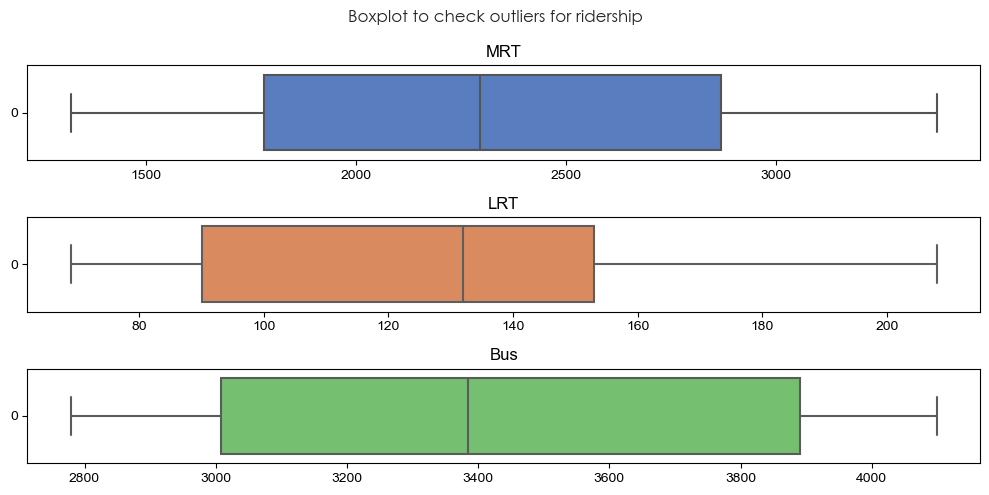

In [13]:
fig,axs = plt.subplots(3,1,figsize=(10,5))
sns.set_style("white",{"font.family":"Century Gothic"})
colCnt = 0
for item in ridership.select_dtypes('number').columns[1:]:
    sns.boxplot(ridership[item],ax=axs[colCnt],color=colour[colCnt],orient='h').set(title=item)
    colCnt+=1
    plt.tight_layout()
    plt.suptitle("Boxplot to check outliers for ridership")
    
plt.show()

## Data Cleaning/Wrangling for final datasets

- Merged all the datasets together (except ridership) with pd.merge()
- Change data type of some columns
- Drop any possible missing values
- Write dataframe to a file and import file in

In [14]:
# Merging datasets together
merge = pd.merge(bus_routes,bus_services,how='inner',on=['ServiceNo','Operator','Direction'])
merge = pd.merge(merge,bus_stops,how='inner',on="BusStopCode")


# Changing data types of specific columns
merge = merge.astype({'ServiceNo':object,"Direction":object})
merge = dropValues(merge)

# Writing and reading final dataset file.
merge.to_csv("./finalDataset.csv",index=False)
finalDataset = pd.read_csv("./finalDataset.csv")

### Summary of Final Datasets

In [15]:
# Summary and information of final dataset
summarise(finalDataset)

Information of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6921 entries, 0 to 6920
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ServiceNo        6921 non-null   object 
 1   Operator         6921 non-null   object 
 2   Direction        6921 non-null   int64  
 3   StopSequence     6921 non-null   int64  
 4   BusStopCode      6921 non-null   int64  
 5   Distance         6921 non-null   float64
 6   WD_FirstBus      6921 non-null   int64  
 7   WD_LastBus       6921 non-null   int64  
 8   SAT_FirstBus     6921 non-null   int64  
 9   SAT_LastBus      6921 non-null   int64  
 10  SUN_FirstBus     6921 non-null   int64  
 11  SUN_LastBus      6921 non-null   int64  
 12  Category         6921 non-null   object 
 13  AM_Peak_Freq     6921 non-null   object 
 14  AM_Offpeak_Freq  6921 non-null   object 
 15  PM_Peak_Freq     6921 non-null   object 
 16  PM_Offpeak_Freq  6921 non-null   obj

In [16]:
# Summary and information ridership dataset
summarise(ridership)

Information of dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    17 non-null     int32
 1   MRT     17 non-null     int32
 2   LRT     17 non-null     int32
 3   Bus     17 non-null     int32
dtypes: int32(4)
memory usage: 964.0 bytes
Sample of dataset:
   Year   MRT  LRT   Bus
5  2016  3095  180  3939
Head of dataset:
   Year   MRT  LRT   Bus
0  2021  2100  151  3008
Tail of dataset:
    Year   MRT  LRT   Bus
16  2005  1321   69  2779

Shape of dataset: (17, 4)	 Size of dataset:68

Number of unique values per column in dataset:
Year    17
MRT     17
LRT     17
Bus     17
dtype: int64

Number of missing data in dataset:
Year    0
MRT     0
LRT     0
Bus     0
dtype: int64


# PLOTTING OF CHARTS

### OBJECTIVE #1 | ANALYSE TRENDS IN RIDERSHIP OF BUSES AND IDENTIFY FACTORS AFFECTING IT

> CHART #1 - Average Daily Ridership between Public Land Transport Systems in Singapore from 2005 to 2021 [SEABORN]

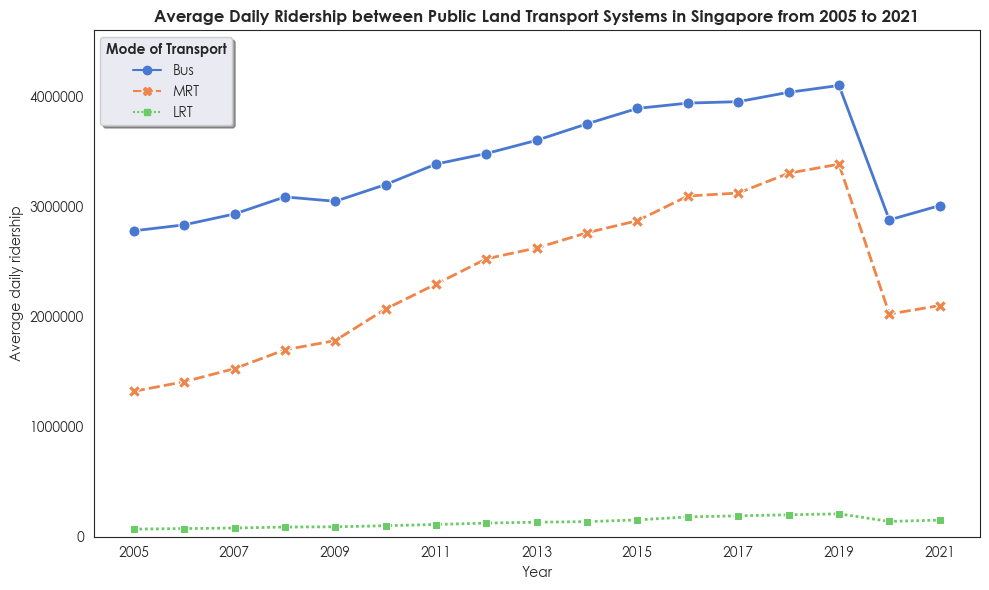

In [17]:
# Variables for plotting
ridership_line = pd.melt(ridership,id_vars=['Year'],value_vars=['Bus','MRT',"LRT"],var_name='Mode',value_name='ridership')
# Change data type for specific column
ridership_line['ridership'] = ridership_line['ridership'].astype(int)
# Apply function to multiply value by 1000 (as initially data was in thousands)
ridership_line['ridership'] = ridership_line['ridership'].apply(lambda x: x*1000)

# Plotting and customization
fig,ax=plt.subplots(figsize=(10,6))
sns.lineplot(ridership_line,hue='Mode',y='ridership',x='Year',ax=ax,markers=True,markersize=8,linewidth=2,style='Mode',palette=colour[:3]).set(ylabel='Average daily ridership')
ax.set_title('Average Daily Ridership between Public Land Transport Systems in Singapore from 2005 to 2021',fontdict={'weight':'semibold'})
sns.set_style('darkgrid',{'font.family':"Century Gothic"})
ax.ticklabel_format(style='plain',axis='y')
ax.set_xticks(range(2005,2022,2))
ax.set_ylim(0,4600000)
plt.legend(shadow=True,title='Mode of Transport',title_fontproperties={'weight':'bold'})

plt.tight_layout()
plt.show()

> INSIGHTS - CHART #1

- Singapore's public bus transport has the highest popularity compared to other public transport systems as shown by the ridership of buses compared to MRTs and LRTs, which highlights how commuters likely prefer buses over the other modes of public transport.

- LRTs have the lowest ridership among all public transport modes shown by the huge difference between riderships of buses and MRTs compared to LRTs, likely due to it being newer, less accessible and hence less prominent to commuters, garnering the least ridership.

- There was a decrease in ridership for all transport systems in 2019 to 2020, likely due to the coronavirus pandemic, lowering its ridership due to stringent rules that were in place, showing how significantly impacted the transport system can be by pandemics and such.

> CHART #2 - Frequency of Bus Arrivals during AM/PM Peak/Offpeak [SEABORN]

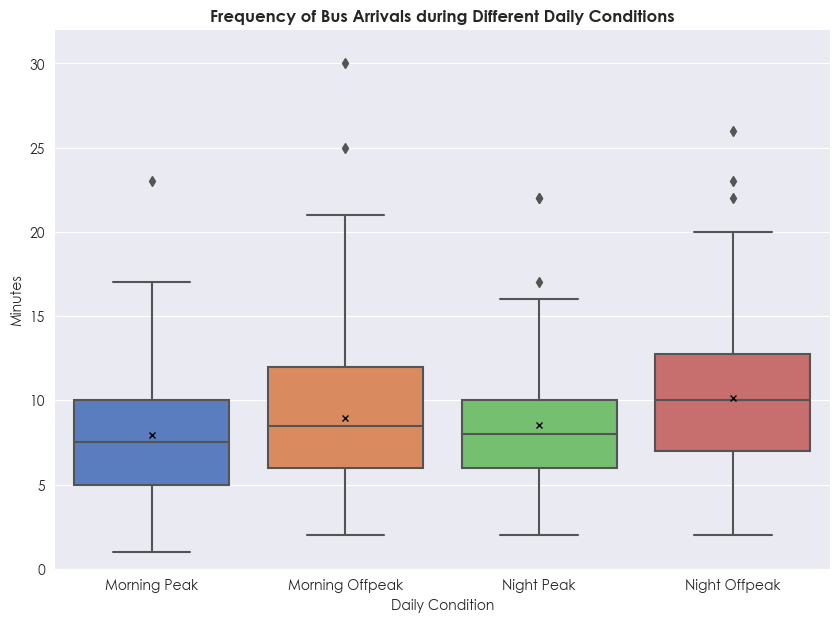

In [18]:
# Variables for plotting
frequency = finalDataset.loc[:,['AM_Peak_Freq','AM_Offpeak_Freq','PM_Peak_Freq','PM_Offpeak_Freq']].drop_duplicates()
frequency.rename(columns={'AM_Peak_Freq':"Morning Peak",'AM_Offpeak_Freq':"Morning Offpeak",'PM_Peak_Freq': "Night Peak",'PM_Offpeak_Freq': "Night Offpeak"},inplace=True)

# Loop through each peak column and grab minimum value of bus arrival timing
for i in frequency.columns:
    for x in range(len(frequency[i].values)):
        frequency[i].values[x] = min(frequency[i].values[x].split("-"))
frequency = frequency.melt(var_name='Frequency',value_name='Minutes')
frequency['Minutes'] = frequency['Minutes'].astype(int)

# Plotting and customization
fig,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data=frequency,y='Minutes',x='Frequency',palette=colour[:4],showmeans=True,meanprops={"marker":"x","markerfacecolor":"red", "markeredgecolor":"black","markersize":4}).set(xlabel='Daily Condition')
ax.set_title("Frequency of Bus Arrivals during Different Daily Conditions",fontdict={'weight':'bold'})
sns.set_style('whitegrid',{'font.family':"Century Gothic"})
sns.set_context("notebook",font_scale=1.1,rc={"grid.linewidth":2})
sns.despine(ax=ax,top=True,right=True,left=True)
ax.set_ylim(0,32)
plt.show()

> INSIGHTS - CHART #2
- The boxplot shows that bus arrival timings tend to be frequent, with median arrival timings around 7 minutes to 10 minutes, which would appeal to commuters as this would help reduce their waiting time and time spent on commuting from one place to another.


- The boxplot shows that LTA caters to its commuters as shown by the higher frequency of bus arrivals (lesser minutes per bus arrival) especially during peak hours compared to offpeak hours, providing a more convenient and frequent transport mode for commuters, which is preferred by commuters and hence explains the higher ridership for buses compared to other transport systems.

- The boxplot also shows that bus arrivals tend to become less frequent later into the day, with mornings having the most frequent buses at a mean of around 7 minutes while nights having lower frequency of bus arrivals at a mean of 10 minutes. This is likely due to the high demand for public transport during the mornings where people are commuting to work or school, hence LTA would increase frequency for bus arrivals, while on the other hand, at night, bus arrivals are less frequent due to lower demand. This shows proper management of bus arrival timings as the frequency of bus arrivals would be altered to meet the demands of public transport accordingly.


> Why there are outliers

- Outliers in bus arrival timings are from night services as there is typically very low demand for night services and hence low frequency of bus arrivals and thus creating outliers in bus arrivals

> CHART #3 - Correlation between Number of Stops Made and Distance [SEABORN]

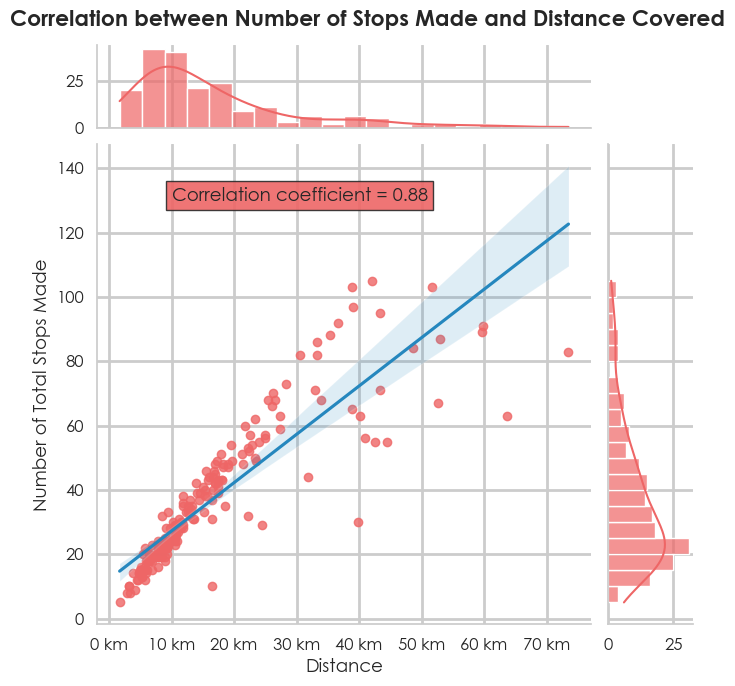

In [19]:
# Variable for plotting
distance_stopSequence = finalDataset.query('Direction == 1')[['ServiceNo','StopSequence','Distance']].groupby('ServiceNo').max()

# Correlation value
corr = distance_stopSequence.corr().loc[:,["Distance",'StopSequence']]['Distance'][0]

# Plotting and customization
g = sns.jointplot(data=distance_stopSequence,x='Distance',y='StopSequence',height=7,color="#ee6666",kind='reg',marginal_kws=dict(bins=20,alpha=0.7),dropna=True,marginal_ticks=True,line_kws=dict(color='#2587be'))
sns.set_style("ticks",{'font.family':"Century Gothic"})
g.set_axis_labels("Distance",'Number of Total Stops Made')
g.fig.suptitle("Correlation between Number of Stops Made and Distance Covered",fontweight='semibold')
g.ax_joint.annotate("Correlation coefficient = {:.2f}".format(corr),xy=(10,130),bbox=dict(facecolor='#ee6666',alpha=0.9,edgecolor='#2a2a2a'))
g.fig.subplots_adjust(top=0.93)
g.ax_joint.xaxis.set_major_formatter("{x:.0f} km")

> INSIGHTS - CHART #3

- The regression plot shows a correlation value of 0.88 which shows a strong positive linear relationship between number of stops made and distance covered, highlighting that as bus services in Singapore tend to have a higher number of stops made in their trips, they tend to cover more distance as well.

- However, the chart shows that there is a higher distribution of bus services that tend to have lower coverage due to a low number of stops made and low distance covered, hence there are more bus services that are focused on covering a smaller area, providing more frequent and convenient travels for its commuters.

- Not only that, the chart also shows that there are also bus services that provide larger coverage as well, although at a lower distribution of services, shown by the high distance covered and high number of stops made, which is likely why the bus transport system is favoured over other transport systems in Singapore as LTA ensures to provide the best of both worlds, with certain bus services having frequent and convenient travels and other bus services with larger coverage to fit the needs of the population.


### OBJECTIVE #2 | COMPARE AND FIND OUT WHICH BUS OPERATOR CONTRIBUTES MOST TO RIDERSHIP OF BUSES

> CHART #1 - Spread of Bus Stops Used by Operator in Singapore [PLOTLY]

In [20]:
# Index Variable
busStopLatLong = finalDataset[['Longitude','Latitude','Operator','RoadName','Description']]

# Plotting
app = dash.Dash()
MBToken = "" # Input Mapbox token [Please use your own mapbox token to view this visualisation on a website.]
fig = px.scatter_mapbox(busStopLatLong,lat='Latitude',lon='Longitude',color='Operator',color_discrete_sequence=px.colors.qualitative.D3,hover_data=['RoadName','Description'],zoom=10,size_max=15)
fig.update_layout(
    mapbox_accesstoken=MBToken,
    margin=dict(l=200,t=50,r=155,b=0),
    title="Operator selected : ALL",
    title_x=0.5,
    font=dict(size=16),
    legend=dict(bordercolor='#dadade',borderwidth=2,bgcolor="#f0ecf4"),
    annotations=[go.layout.Annotation(
        text='Filter',
        yanchor='top',
        y=1.05,
        xanchor='left',
        x=-0.11,
        showarrow=False,
        font=dict(size=16))],
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'ALL',
                  method = 'update',
                  args = [{'visible': [True, True, True, True]},
                          {'title': 'Operator selected : ALL',
                           'showlegend':True}]),
             dict(label = 'SBST',
                  method = 'update',
                  args = [{'visible': [True, False, False, False]},
                          {'title': 'Operator selected : SBST',
                           'showlegend':True}]),
             dict(label = 'SMRT',
                  method = 'update',
                  args = [{'visible': [False, False, True, False]},
                          {'title': 'Operator selected : SMRT',
                           'showlegend':True}]),
             dict(label = 'GAS',
                  method = 'update',
                  args = [{'visible': [False, True, False, False]},
                          {'title': 'Operator selected : GAS',
                           'showlegend':True}]),
            dict(label = 'TTS',
                  method = 'update',
                  args = [{'visible': [False, False, False, True]},
                          {'title': 'Operator selected : TTS',
                           'showlegend':True}]),
            ])
        )
    ],
    font_family="Century Gothic"
)
app.layout = html.Div(children=[
    html.H1(children='Spread of Bus Stops Used by Operator in Singapore',style={'textAlign':'center','font-family':"Century Gothic"}),
    dcc.Graph(
        id='mapbox',
        figure=fig
    ),
    html.Div(children='*Use filter on the left to filter between bus operators, or use legend on the right to filter out bus operators.',style={'textAlign':'center','font-family':"Century Gothic","margin-top":"30px","color":"#ee6666","font-weight":"bold"}),
    html.Div(children='*Hover over each dot on the map to view information of each bus stop',style={'textAlign':'center','font-family':"Century Gothic","margin-top":"30px","color":"#ee6666","font-weight":"bold"})
])
if __name__ == '__main__':
    app.run_server()


NameError: name 'dash' is not defined

> INSIGHTS - CHART #1

- By comparing the distribution of bus stops used by each operator, we can clearly see that SBST covers the largest land area significantly, as there are bus stops used by SBST throughout Singapore, showing that among the four bus operators, SBST would likely have the best coverage, followed by SMRT, GAS, and TTS. Hence showing that SBST would be a more prominent bus operator that is widely used by commuters in Singapore, due to a higher accessibility to SBST buses, allowing it to contribute most towards riderships.

- This also shows how each operator except SBST focuses on providing their services to each region in Singapore, as SMRT utilizes bus stops towards the North side of Singapore, GAS utilizing the East side of Singapore, and TTS utilizing the West side of Singapore, which indicates proper planning of deployment of services by each operator in order to maximise riderships. This highlights the importance of proper planning of deployment of services.

> CHART #2 - Distance covered in km and Number of Stops Made by Buses by Category [SEABORN]

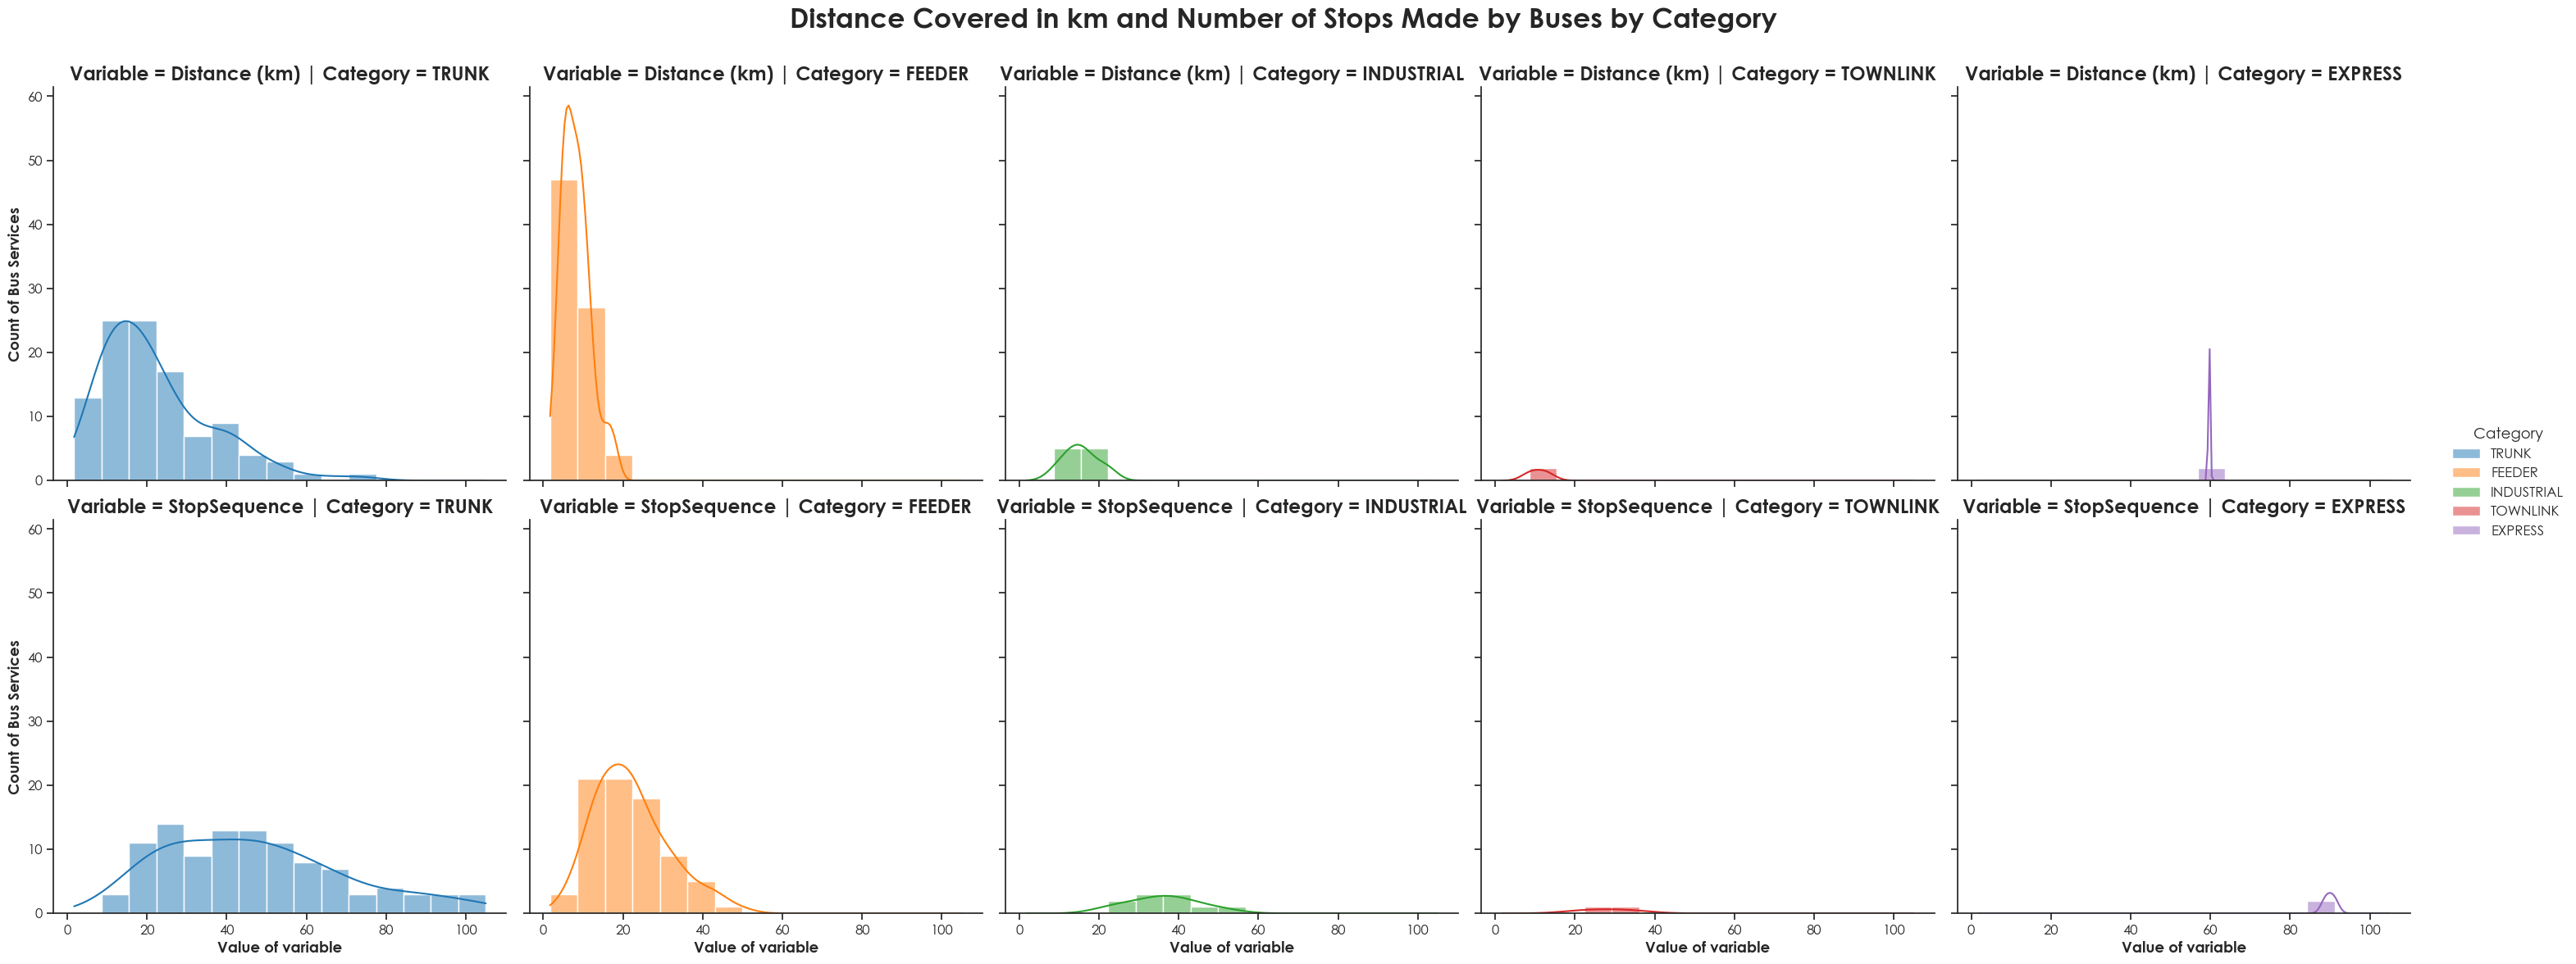

In [21]:
# Declaring variables for plotting and customization
distStopsByCategory = finalDataset.loc[:,['ServiceNo','Category','Distance','StopSequence']].groupby(['ServiceNo','Category']).max()
distStopsByCategory.reset_index(inplace=True)
distStopsByCategory.drop(columns=['ServiceNo'],inplace=True)
distStopsByCategory.rename(columns={'Distance':"Distance (km)"},inplace=True)
df_distStops = distStopsByCategory.melt(id_vars='Category',var_name='Variable',value_name='value')

# Plotting and custommization
g = sns.displot(df_distStops,col='Category',row='Variable',x='value',kind='hist',hue='Category',fill=True,kde=True,color=colour,height=6)
sns.set_style("darkgrid",{'font.family':"Century Gothic"})
sns.set_context('notebook',font_scale=1.40)
g.set_axis_labels(x_var='Value of variable',y_var='Count of Bus Services',fontdict={'weight':'bold'})
g.set_titles(fontdict={'weight':'bold'})
g.fig.suptitle("Distance Covered in km and Number of Stops Made by Buses by Category",fontweight='bold',fontsize=24)
g.fig.subplots_adjust(top=0.9)

> INSIGHTS - CHART #2

- The chart shows bus categories such as FEEDER, TOWNLINK or INDUSTRIAL have greater distribution of bus services with a low number of stops and low distance covered and bus category of EXPRESS with higher number of stops and higher distance, leading to lower accessbility of bus stops, but having greater coverage.

- Meanwhile TRUNK buses are more convenient and accessible compared to all other categories, as shown by a higher distribution of bus services with lower distance covered but higher number of stops made, allowing for more stops in a smaller area. Hence, TRUNK buses are likely more popular for commuters due to its accessibility and convenience, causing it to be more favoured by bus operators, also shown by the higher number of counts of TRUNK buses compared to the other bus categories.

> CHART #3 - Sunburst plot of Operator and Category of Buses in Singapore [PLOTLY]

In [23]:
# Variables for plotting
countCategory = finalDataset.loc[:,['ServiceNo','Operator','Category']].drop_duplicates().groupby(['Operator','Category']).count()
countCategory.reset_index(inplace=True)

# Plotting and customization
sbplot = px.sunburst(countCategory,path=['Operator','Category'],values='ServiceNo',color_discrete_sequence=px.colors.qualitative.D3)
fig = go.Figure(go.Sunburst(
                    labels=sbplot['data'][0]['labels'].tolist(),
                    parents=sbplot['data'][0]['parents'].tolist(),
                    values=sbplot['data'][0]['values'].tolist(),
                    ids=sbplot['data'][0]['ids'].tolist(),
                    branchvalues='total',
                    insidetextorientation='horizontal',
                    rotation=0
                    ))
fig.update_layout(
    title_text='<b>Sunburst plot of Operator and Category of Buses in Singapore<br><sup>Click to filter each operator</sup></b>',
    title_x=0.5,
    font=dict(size=14),
    font_family='Century Gothic',
    margin=dict(l=0,t=60,b=20,r=0),
    width=600,
    hoverlabel=dict(font_family='Century Gothic',font_size=16),
)
fig.update_traces(
    textinfo='label+value',
    hovertemplate="<b>%{parent}<br><em>%{label}</em></b><br>Number of Bus Services: %{value}<extra></extra>"
)
fig.show()

NameError: name 'go' is not defined

> INSIGHTS - CHART #3

- SBST operator buses have a significantly higher number of bus services, with 118, compared to other operators such as SMRT with 39, GAS or TTS with 20 each, showing that SBST would be the bus operator that contributes the most towards riderships of buses in Singapore, as higher number of bus services would allow for the operator to provide their service to a larger area in Singapore, catering to a higher number of commuters leading to more riderships.

- Not only that, SBST also has higher number of TRUNK buses at 61, which is the more popular bus category due to its convenience and accessibility shown earlier, and hence likely provide better services with more convenience and accessibility to its commuters, bringing in more ridership. Hence, it is likely that SBST would be the best operator among bus operators due to factors such as higher convenience and accessibility based on their bus services, and having the greatest coverage.

- SBST and GAS also has bus services of multiple bus categories, allowing them to provide a higher number of differing services to commuters, showing how they focus on having a variety of bus categories to increase riderships compared to SMRT or TTS


# CONCLUSIONS:

## OBJECTIVE #1:
- Riderships of buses are the highest compared to other public transport modes. 
- Likely due to frequent arrivals, proper management of arrival timings and convenience. 
- Buses fit the needs of the population > Buses that are convenient and accessible, and buses that have greater coverage

## OBJECTIVE #2:
- Bus operators prioritize proper planning of deployment of services to maximise riderships 
- Bus operators such as SBST and GAS focus on providing a variety of bus categories compared to SMRT and TTS
- SBST would contribute most towards ridership due to higher coverage, providing more accessibility and convenience and being more prominent

## RECOMMENDATIONS
- Increase the number of bus services that have higher distance covered and higher number of stops to provide more buses with greater coverage
- Operators should increase their number of bus services on bus categories such as INDUSTRIAL and EXPRESS to accommodate towards more commuters